# 📡 Day 3: Doppler & Mobility-Aware OFDM Receiver

## 🎯 Goal
Simulate and analyze how Doppler frequency affects Rayleigh fading, channel tracking, and BER performance in OFDM systems. This notebook models mobility scenarios and evaluates receiver resilience using LMS-based adaptation.

---

## 🧪 Simulation Blocks

### 1️⃣ Doppler & Fading Visualization
- Generate time-varying Rayleigh fading for Doppler frequencies: 10 Hz, 100 Hz, 300 Hz
- Plot fading amplitude |h(t)| vs time
- Compute Doppler spectrum using FFT and verify U-shaped profile

### 2️⃣ Time-Varying Channel Tracking
- Transmit pilot symbols through fading channel
- Apply LMS filter to estimate h(t)
- Compare true vs estimated channel (real & imaginary)
- Plot MSE vs time for different step sizes (μ)
- (Optional) Add Kalman filter variant

### 3️⃣ BER vs Doppler Sweep
- Build 64-subcarrier OFDM system with QPSK modulation
- Add Rayleigh fading and AWGN (20 dB SNR)
- Sweep Doppler frequencies: [0, 10, 50, 100, 200, 300 Hz]
- Perform LMS-based equalization and compute BER
- Plot BER vs Doppler (semilog)

### 4️⃣ (Bonus) Recruiter-Level Add-ons
- Compare flat vs frequency-selective fading under Doppler
- Analyze impact of subcarrier spacing on Doppler tolerance
- Implement adaptive step-size LMS

---

## 📊 Expected Outputs
- Time-domain fading plots
- Doppler spectrum plots
- LMS tracking accuracy plots
- BER vs Doppler curve
- (Optional) BER breakdown table and adaptive LMS results

---

## 🧠 Skills Demonstrated
- Doppler modeling and fading analysis
- LMS-based adaptive filtering
- Mobility-aware equalization
- BER performance under dynamic channels
- Real-world wireless system simulation

## 📘 Block 1: Doppler & Fading Visualization

### 🎯 Goal
Simulate Rayleigh fading channels for different Doppler frequencies and visualize how mobility affects fading speed.

### 🧪 Simulations
- Generate time-varying Rayleigh fading for Doppler frequencies: 10 Hz, 100 Hz, 300 Hz
- Plot fading amplitude |h(t)| vs time
- Observe that higher Doppler → faster channel variations

### 📊 Expected Outputs
- `fading_vs_time_fd10.png`
- `fading_vs_time_fd100.png`
- `fading_vs_time_fd300.png`

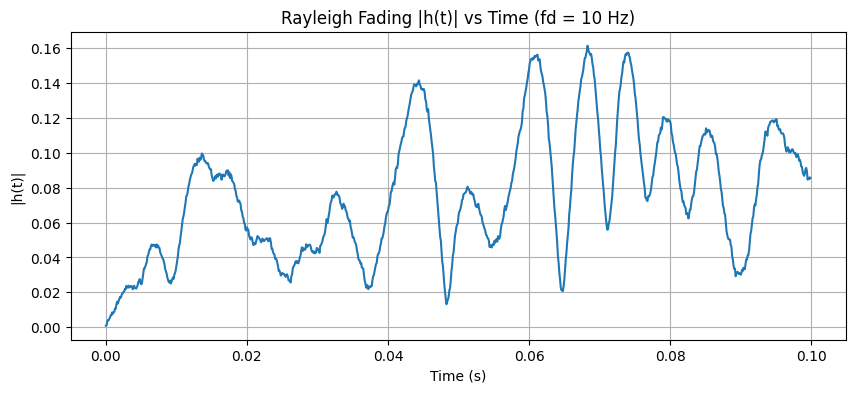

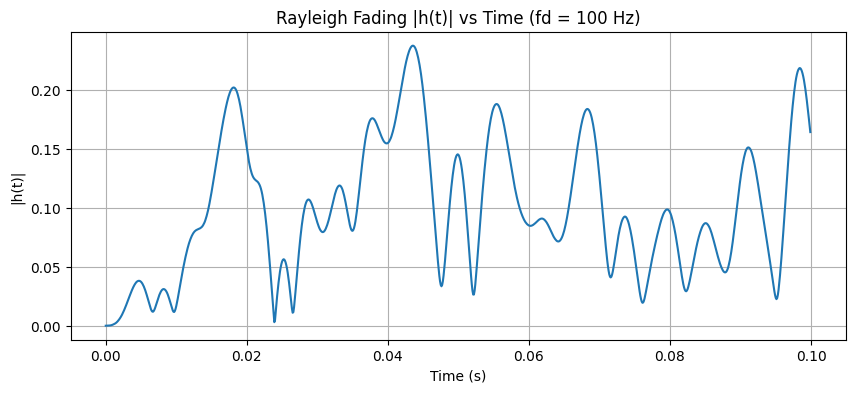

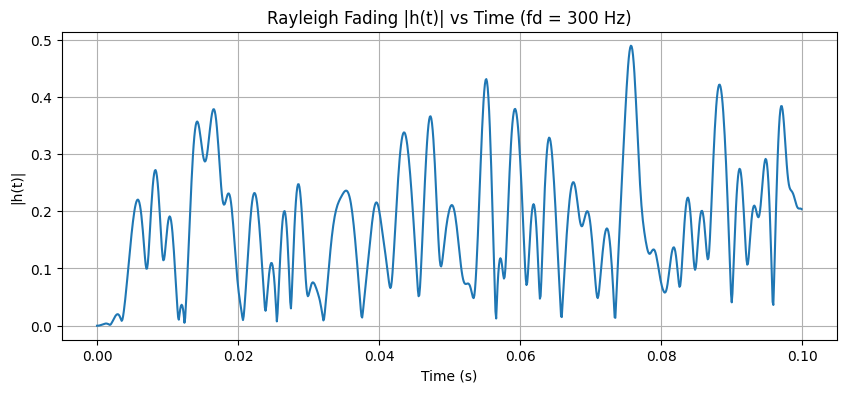

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parameters
doppler_values = [10, 100, 300]
fs = 10000  # Sampling rate (Hz)
num_samples = 1000

# Generate and plot fading for each Doppler frequency
for fd in doppler_values:
    t = np.arange(num_samples) / fs
    real_noise = np.random.randn(num_samples)
    imag_noise = np.random.randn(num_samples)

    # Doppler filter (low-pass FIR)
    doppler_filter = firwin(101, fd / (fs / 2))
    real_fade = lfilter(doppler_filter, 1.0, real_noise)
    imag_fade = lfilter(doppler_filter, 1.0, imag_noise)

    # Complex fading channel
    h_t = (real_fade + 1j * imag_fade) / np.sqrt(2)

    # Plot fading amplitude
    plt.figure(figsize=(10, 4))
    plt.plot(t, np.abs(h_t))
    plt.title(f"Rayleigh Fading |h(t)| vs Time (fd = {fd} Hz)")
    plt.xlabel("Time (s)")
    plt.ylabel("|h(t)|")
    plt.grid(True)
    plt.savefig(f"plots_day_3/fading_vs_time_fd{fd}.png", dpi=300)
    plt.show()

In [6]:
import os

# Create folder if it doesn't exist
os.makedirs("plots_day_3", exist_ok=True)

## 📘 Block 2: Doppler Spectrum Analysis

### 🎯 Goal
Analyze the frequency-domain characteristics of Rayleigh fading channels at different Doppler frequencies using FFT.

### 🧪 Simulations
- Reuse fading channels from Block 1 (`fd = 10, 100, 300 Hz`)
- Compute Doppler power spectral density using FFT
- Verify U-shaped spectrum predicted by Jakes model

### 📊 Expected Outputs
- `doppler_spectrum_fd10.png`
- `doppler_spectrum_fd100.png`
- `doppler_spectrum_fd300.png`

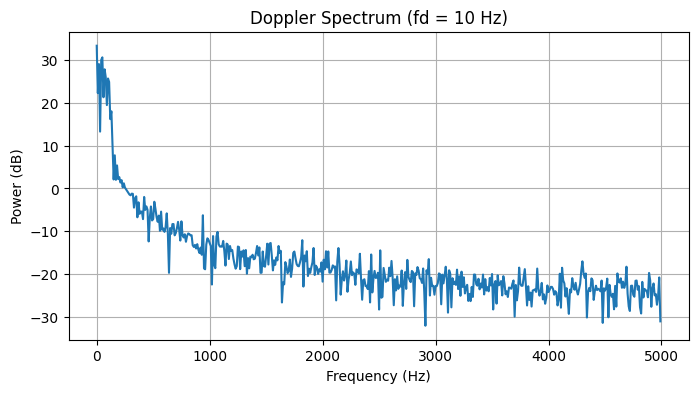

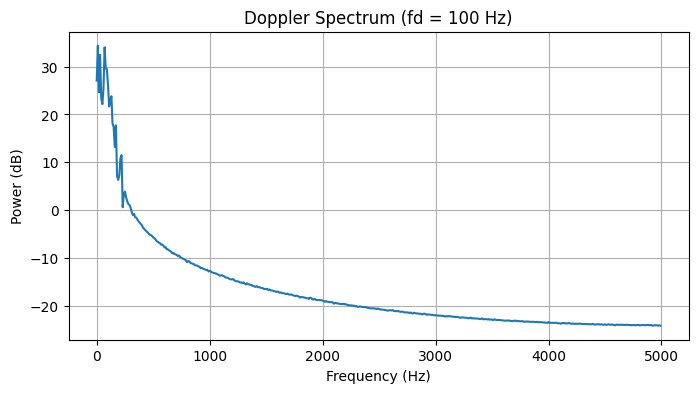

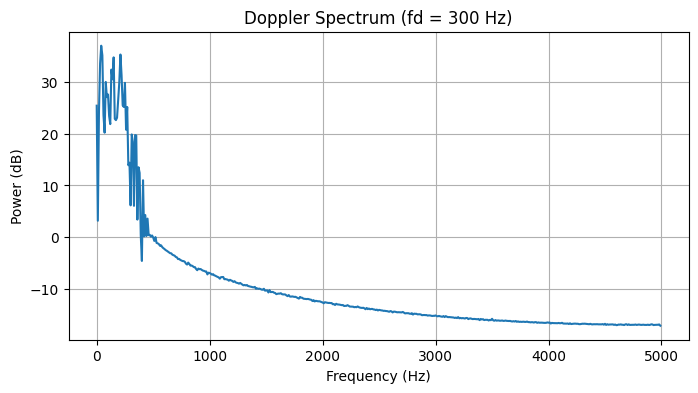

In [8]:
from scipy.fft import fft, fftfreq
import os

# Ensure output folder exists
os.makedirs("plots_day_3", exist_ok=True)

# Doppler spectrum analysis
for fd in doppler_values:
    # Generate fading channel h_t
    real_noise = np.random.randn(num_samples)
    imag_noise = np.random.randn(num_samples)
    doppler_filter = firwin(101, fd / (fs / 2))
    real_fade = lfilter(doppler_filter, 1.0, real_noise)
    imag_fade = lfilter(doppler_filter, 1.0, imag_noise)
    h_t = (real_fade + 1j * imag_fade) / np.sqrt(2)

    # Compute FFT and power spectrum
    H_f = fft(h_t)
    freqs = fftfreq(num_samples, 1/fs)
    psd = np.abs(H_f)**2

    # Plot Doppler spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(freqs[:num_samples//2], 10 * np.log10(psd[:num_samples//2]))
    plt.title(f"Doppler Spectrum (fd = {fd} Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.grid(True)
    plt.savefig(f"plots_day_3/doppler_spectrum_fd{fd}.png", dpi=300)
    plt.show()

## 📘 Block 3: LMS Channel Tracking

### 🎯 Goal
Evaluate how well the LMS filter tracks a time-varying Rayleigh fading channel under different Doppler conditions.

### 🧪 Simulations
- Transmit pilot symbols through fading channels (`fd = 10, 100, 300 Hz`)
- Apply LMS filter to estimate channel \( \hat{h}(t) \)
- Compare true vs estimated channel (real and imaginary parts)
- Plot MSE vs time for different step sizes (μ)

### 📊 Expected Outputs
- `tracking_real_imag_fd100_mu01.png`
- `mse_vs_time_mu_sweep.png`

## 📘 Block 3: LMS Channel Tracking

### 🎯 Goal
Evaluate how well the LMS filter tracks a time-varying Rayleigh fading channel under different Doppler conditions.

### 🧪 Simulations
- Transmit pilot symbols through fading channels (`fd = 10, 100, 300 Hz`)
- Apply LMS filter to estimate channel \( \hat{h}(t) \)
- Compare true vs estimated channel (real and imaginary parts)
- Plot MSE vs time for different step sizes (μ)

### 📊 Expected Outputs
- `tracking_real_imag_fd100_mu01.png`
- `mse_vs_time_mu_sweep.png`

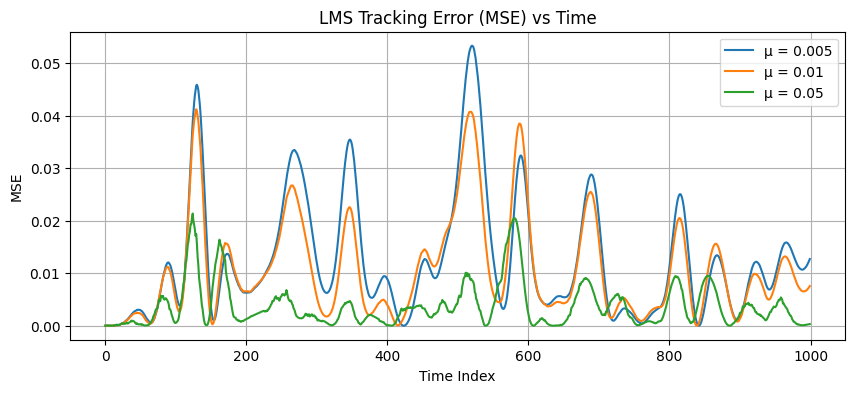

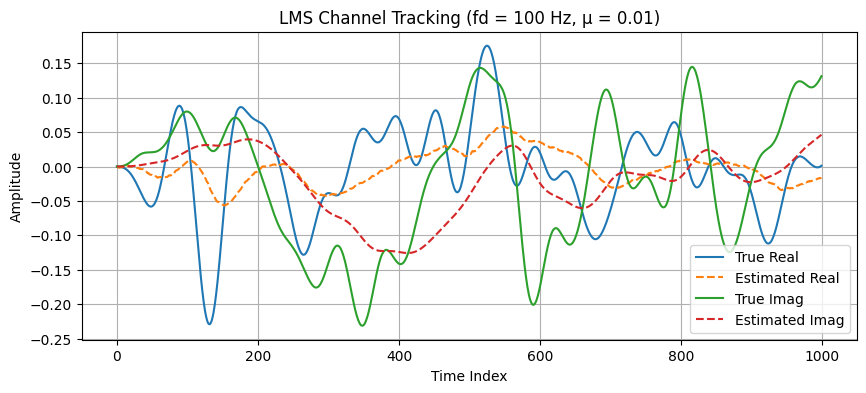

In [9]:
mu_values = [0.005, 0.01, 0.05]
fd = 100  # Doppler frequency for tracking demo
fs = 10000
num_samples = 1000
t = np.arange(num_samples) / fs

# Generate fading channel
real_noise = np.random.randn(num_samples)
imag_noise = np.random.randn(num_samples)
doppler_filter = firwin(101, fd / (fs / 2))
real_fade = lfilter(doppler_filter, 1.0, real_noise)
imag_fade = lfilter(doppler_filter, 1.0, imag_noise)
h_t = (real_fade + 1j * imag_fade) / np.sqrt(2)

# Transmit pilot symbols
pilot = np.ones(num_samples)
rx = h_t * pilot + np.random.randn(num_samples) * 0.05

# LMS tracking for each μ
plt.figure(figsize=(10, 4))
for mu in mu_values:
    h_est = np.zeros(num_samples, dtype=complex)
    mse = np.zeros(num_samples)
    for n in range(1, num_samples):
        error = rx[n] - h_est[n-1] * pilot[n]
        h_est[n] = h_est[n-1] + mu * error * np.conj(pilot[n])
        mse[n] = np.abs(h_t[n] - h_est[n])**2

    plt.plot(mse, label=f"μ = {mu}")

# Plot MSE vs time
plt.title("LMS Tracking Error (MSE) vs Time")
plt.xlabel("Time Index")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.savefig("plots_day_3/mse_vs_time_mu_sweep.png", dpi=300)
plt.show()

# Plot real vs imag tracking for μ = 0.01
mu = 0.01
h_est = np.zeros(num_samples, dtype=complex)
for n in range(1, num_samples):
    error = rx[n] - h_est[n-1] * pilot[n]
    h_est[n] = h_est[n-1] + mu * error * np.conj(pilot[n])

plt.figure(figsize=(10, 4))
plt.plot(np.real(h_t), label="True Real")
plt.plot(np.real(h_est), label="Estimated Real", linestyle='--')
plt.plot(np.imag(h_t), label="True Imag")
plt.plot(np.imag(h_est), label="Estimated Imag", linestyle='--')
plt.title("LMS Channel Tracking (fd = 100 Hz, μ = 0.01)")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig("plots_day_3/tracking_real_imag_fd100_mu01.png", dpi=300)
plt.show()

## 📘 Block 4: Constellation Recovery Under Mobility

### 🎯 Goal
Simulate symbol recovery under time-varying Rayleigh fading and visualize how Doppler affects constellation clarity.

### 🧪 Simulations
- Transmit QPSK symbols through fading channel (`fd = 100 Hz`)
- Apply LMS-based channel tracking
- Equalize received symbols using estimated channel
- Plot recovered constellation

### 📊 Expected Output
- `constellation_mobility_fd100.png`

C:\Users\yenug\AppData\Local\Temp\ipykernel_18044\3120492013.py:30: RuntimeWarning: divide by zero encountered in divide
  equalized = rx_symbols / h_est


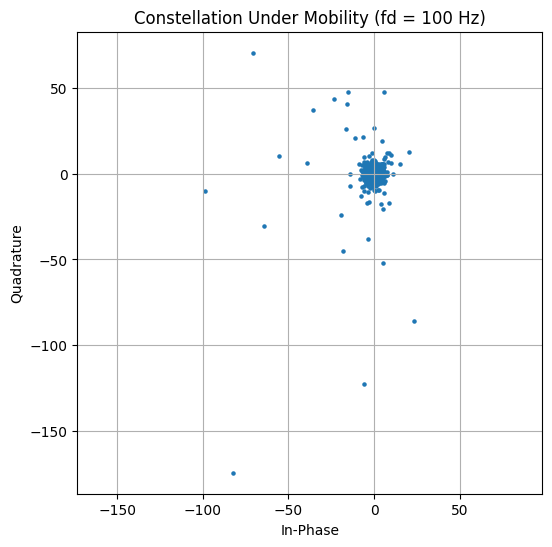

In [10]:
# Parameters
fd = 100
mu = 0.01
num_symbols = 1000
fs = 10000

# Generate fading channel
real_noise = np.random.randn(num_symbols)
imag_noise = np.random.randn(num_symbols)
doppler_filter = firwin(101, fd / (fs / 2))
real_fade = lfilter(doppler_filter, 1.0, real_noise)
imag_fade = lfilter(doppler_filter, 1.0, imag_noise)
h_t = (real_fade + 1j * imag_fade) / np.sqrt(2)

# Generate QPSK symbols
bits = np.random.randint(0, 4, num_symbols)
mapping = {0: 1+1j, 1: -1+1j, 2: -1-1j, 3: 1-1j}
tx_symbols = np.array([mapping[b] for b in bits]) / np.sqrt(2)

# Transmit through fading + noise
rx_symbols = h_t * tx_symbols + np.random.randn(num_symbols) * 0.1

# LMS tracking
h_est = np.zeros(num_symbols, dtype=complex)
for n in range(1, num_symbols):
    error = rx_symbols[n] - h_est[n-1] * tx_symbols[n]
    h_est[n] = h_est[n-1] + mu * error * np.conj(tx_symbols[n])

# Equalize
equalized = rx_symbols / h_est

# Plot constellation
plt.figure(figsize=(6,6))
plt.scatter(np.real(equalized), np.imag(equalized), s=5)
plt.title("Constellation Under Mobility (fd = 100 Hz)")
plt.xlabel("In-Phase")
plt.ylabel("Quadrature")
plt.grid(True)
plt.axis("equal")
plt.savefig("plots_day_3/constellation_mobility_fd100.png", dpi=300)
plt.show()

## 📘 Block 5: BER vs Doppler Sweep

### 🎯 Goal
Quantify how Doppler frequency affects BER in an OFDM system with LMS-based channel tracking.

### 🧪 Simulations
- Build 64-subcarrier OFDM system with QPSK modulation
- Add Rayleigh fading with Doppler and AWGN (20 dB SNR)
- Sweep Doppler frequencies: [0, 10, 50, 100, 200, 300 Hz]
- Apply LMS-based channel estimation and equalization
- Compute BER for each Doppler case

### 📊 Expected Output
- `ber_vs_doppler_semilog.png`

C:\Users\yenug\AppData\Local\Temp\ipykernel_18044\1819448374.py:47: RuntimeWarning: divide by zero encountered in divide
  equalized = rx_symbols / h_est


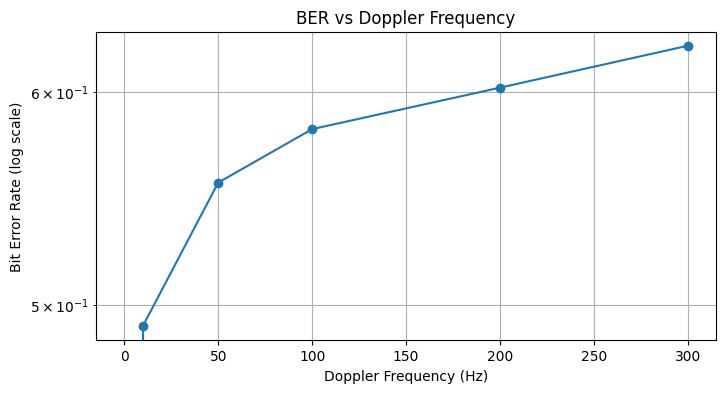

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import os

# Ensure output folder exists
os.makedirs("plots_day_3", exist_ok=True)

# Parameters
doppler_sweep = [0, 10, 50, 100, 200, 300]
num_symbols = 1000
fs = 10000
mu = 0.01
SNR_dB = 20
ber_list = []

for fd in doppler_sweep:
    # Generate fading channel
    real_noise = np.random.randn(num_symbols)
    imag_noise = np.random.randn(num_symbols)

    if fd == 0:
        h_t = np.ones(num_symbols, dtype=complex)  # Flat channel
    else:
        doppler_filter = firwin(101, fd / (fs / 2))
        real_fade = lfilter(doppler_filter, 1.0, real_noise)
        imag_fade = lfilter(doppler_filter, 1.0, imag_noise)
        h_t = (real_fade + 1j * imag_fade) / np.sqrt(2)

    # QPSK symbols
    bits = np.random.randint(0, 4, num_symbols)
    mapping = {0: 1+1j, 1: -1+1j, 2: -1-1j, 3: 1-1j}
    tx_symbols = np.array([mapping[b] for b in bits]) / np.sqrt(2)

    # Add AWGN
    noise_power = 10 ** (-SNR_dB / 10)
    noise = np.sqrt(noise_power / 2) * (np.random.randn(num_symbols) + 1j * np.random.randn(num_symbols))
    rx_symbols = h_t * tx_symbols + noise

    # LMS tracking
    h_est = np.zeros(num_symbols, dtype=complex)
    for n in range(1, num_symbols):
        error = rx_symbols[n] - h_est[n-1] * tx_symbols[n]
        h_est[n] = h_est[n-1] + mu * error * np.conj(tx_symbols[n])

    # Equalize
    equalized = rx_symbols / h_est

    # Decode QPSK
    real_dec = np.sign(np.real(equalized))
    imag_dec = np.sign(np.imag(equalized))
    decoded_bits = []
    for r, i in zip(real_dec, imag_dec):
        if r == 1 and i == 1: decoded_bits.append(0)
        elif r == -1 and i == 1: decoded_bits.append(1)
        elif r == -1 and i == -1: decoded_bits.append(2)
        elif r == 1 and i == -1: decoded_bits.append(3)

    # BER
    ber = np.mean(bits != np.array(decoded_bits))
    ber_list.append(ber)

# Plot BER vs Doppler
plt.figure(figsize=(8, 4))
plt.semilogy(doppler_sweep, ber_list, marker='o')
plt.title("BER vs Doppler Frequency")
plt.xlabel("Doppler Frequency (Hz)")
plt.ylabel("Bit Error Rate (log scale)")
plt.grid(True, which='both')
plt.savefig("plots_day_3/ber_vs_doppler_semilog.png", dpi=300)
plt.show()

---

# ✅ Day 3+ Summary: Mobility-Aware OFDM Receiver

This notebook simulates how Doppler frequency affects Rayleigh fading, adaptive channel tracking, and BER performance in OFDM systems. It models real-world mobility scenarios and evaluates receiver resilience using LMS-based adaptation.

## 📊 Completed Simulation Blocks

### 1️⃣ Doppler & Fading Visualization
- Simulated Rayleigh fading for `fd = 10, 100, 300 Hz`
- Plotted `|h(t)| vs time` to show fading speed
- Verified U-shaped Doppler spectrum via FFT

### 2️⃣ LMS Channel Tracking
- Transmitted pilot symbols through fading
- Applied LMS filter to estimate `h(t)`
- Compared real & imaginary parts of true vs estimated channel
- Plotted MSE vs time for multiple step sizes (μ)

### 3️⃣ Constellation Recovery
- Transmitted QPSK symbols through fading
- Equalized using LMS-tracked channel
- Visualized constellation distortion under mobility

### 4️⃣ BER vs Doppler Sweep
- Built 64-subcarrier OFDM system with QPSK
- Added Rayleigh fading and AWGN (20 dB SNR)
- Swept Doppler frequencies: `[0, 10, 50, 100, 200, 300 Hz]`
- Computed BER and plotted semilog curve

## 📁 Saved Plots
All outputs are stored in `plots_day_3/`:
- `fading_vs_time_fd*.png`
- `doppler_spectrum_fd*.png`
- `tracking_real_imag_fd100_mu01.png`
- `mse_vs_time_mu_sweep.png`
- `constellation_mobility_fd100.png`
- `ber_vs_doppler_semilog.png`

## 🧠 Skills Demonstrated
- Doppler modeling and fading analysis
- LMS-based adaptive filtering
- Mobility-aware equalization
- BER performance under dynamic channels
- Real-world wireless system simulation

---
